In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os
os.chdir('/Users/fulinq/Documents/KMITL/FinancialEngineering/Y4/Y4T1/PROJECT/ARDL-ECM/Code/Thai')

In [2]:
df = pd.read_csv('ardl_kkp_result.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df = df[df.index < '2026-01-01']

col_to_exp = ['Actual', 'ECM', 'AR', 'RW']
for col in col_to_exp:
    df[col] = np.exp(df[col])
    
df['signal'] = np.where(df['ECM'] - df['Actual'] > 0, 1, -1)
df['jump'] = df['Actual'].shift(-1)
df['return'] = np.log((df['jump'] / df['Actual'])**df['signal'])
df.dropna(inplace=True)
df = df[['Actual', 'jump', 'ECM', 'AR', 'RW', 'signal', 'return']]
df

,Actual,jump,ECM,AR,RW,signal,return
Date,,,,,,,
2023-07-01,47.106121,50.925541,44.775154,50.653289,50.713352,-1,-0.077962
2023-08-01,50.925541,46.893936,38.583011,47.163187,47.106121,-1,0.082476
2023-09-01,46.893936,42.698406,43.716271,50.659009,50.925541,-1,0.093727
2023-10-01,42.698406,41.397949,31.804886,47.038702,46.893936,-1,0.030930
2023-11-01,41.397949,43.565380,29.914178,42.942689,42.698406,-1,-0.051031
2023-12-01,43.565380,42.264923,35.877381,41.612298,41.397949,-1,0.030305
2024-01-01,42.264923,44.649094,37.690958,43.623382,43.565380,-1,-0.054877
2024-02-01,44.649094,45.732811,40.037877,42.450903,42.264923,-1,-0.023982
2024-03-01,45.732811,45.082581,41.438798,44.647552,44.649094,-1,0.014320


<Axes: title={'center': 'Cumulative Return from ECM Strategy'}, xlabel='Date'>

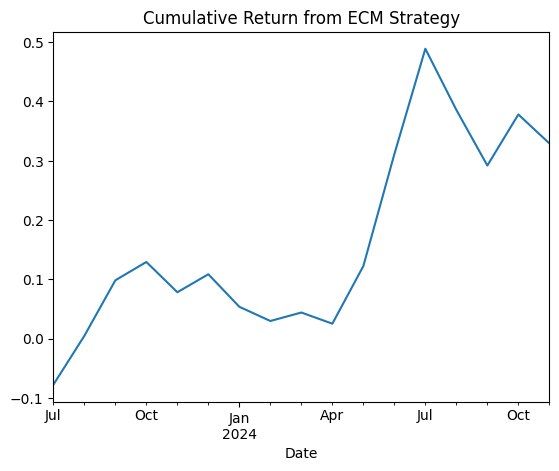

In [3]:
df['return'].cumsum().plot(title='Cumulative Return from ECM Strategy')

In [4]:
rmse = np.sqrt(mean_squared_error(df['Actual'], df['ECM']))
mae = mean_absolute_error(df['Actual'], df['ECM'])
r2 = r2_score(df['Actual'], df['ECM'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 7.329571803368054
MAE: 6.369254519399964
R²: -2.9453499141669135
